In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
print(sklearn.__version__)

1.5.1


In [3]:
df = pd.read_csv('./data/cardio_processed_data.csv')
df

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse_pressure,cardio
0,50,1,168,62.0,21.967120,110,80,1,1,0,0,1,30,0
1,55,0,156,85.0,34.927679,140,90,3,1,0,0,1,50,1
2,51,0,165,64.0,23.507805,130,70,3,1,0,0,0,60,1
3,48,1,169,82.0,28.710479,150,100,1,1,0,0,1,50,1
4,47,0,156,56.0,23.011177,100,60,1,1,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68545,52,1,168,76.0,26.927438,120,80,1,1,1,0,1,40,0
68546,61,0,158,126.0,50.472681,140,90,2,2,0,0,1,50,1
68547,52,1,183,105.0,31.353579,180,90,3,1,0,1,0,90,1
68548,61,0,163,72.0,27.099251,135,80,1,2,0,0,0,55,1


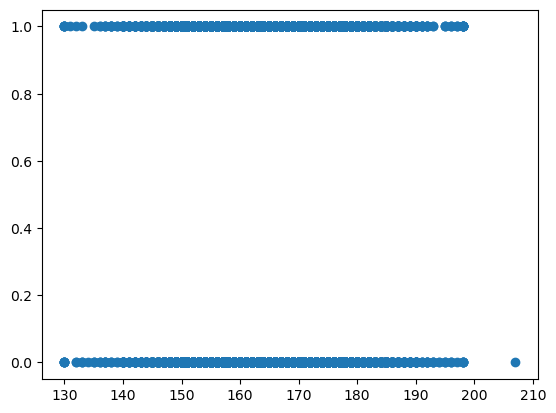

In [4]:
plt.scatter(df['height'] , df['cardio'])


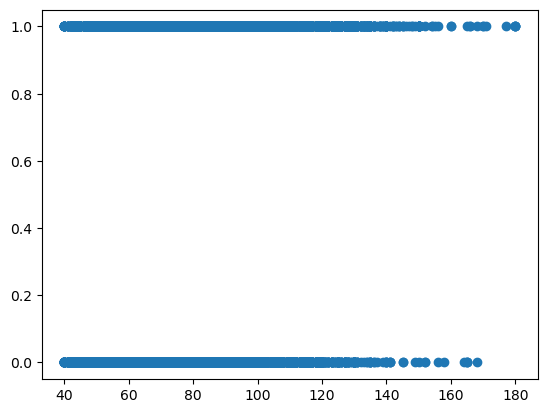

In [5]:
plt.scatter(df['weight'] , df['cardio'])

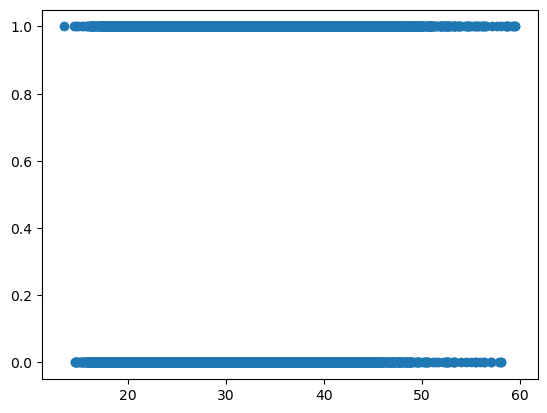

In [6]:
plt.scatter(df['bmi'] , df['cardio'])

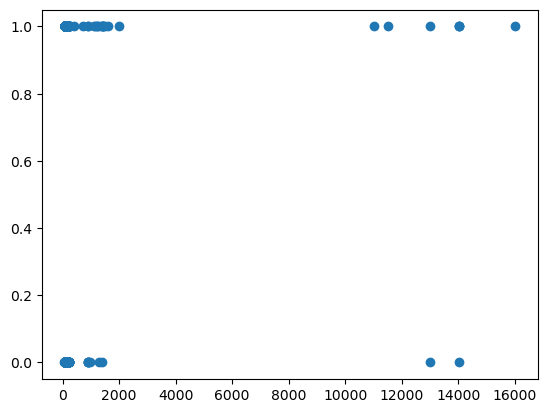

In [7]:
plt.scatter(df['ap_hi'] , df['cardio'])

In [8]:
df.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse_pressure,cardio
0,50,1,168,62.0,21.967120,110,80,1,1,0,0,1,30,0
1,55,0,156,85.0,34.927679,140,90,3,1,0,0,1,50,1
2,51,0,165,64.0,23.507805,130,70,3,1,0,0,0,60,1
3,48,1,169,82.0,28.710479,150,100,1,1,0,0,1,50,1
4,47,0,156,56.0,23.011177,100,60,1,1,0,0,0,40,0


In [9]:
df['cardio'].value_counts(normalize=True)

cardio
0    0.505062
1    0.494938
Name: proportion, dtype: float64

In [10]:
x = df.drop('cardio',axis=1)

In [11]:
y = df['cardio']

In [12]:
x.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse_pressure
0,50,1,168,62.0,21.967120,110,80,1,1,0,0,1,30
1,55,0,156,85.0,34.927679,140,90,3,1,0,0,1,50
2,51,0,165,64.0,23.507805,130,70,3,1,0,0,0,60
3,48,1,169,82.0,28.710479,150,100,1,1,0,0,1,50
4,47,0,156,56.0,23.011177,100,60,1,1,0,0,0,40


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y , random_state=50)

In [15]:
# len(x_train)
x_train.shape

(54840, 13)

In [16]:
# len(x_test)
x_test.shape

(13710, 13)

In [17]:
x_train

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse_pressure
568,51,1,160,63.0,24.609375,170,90,1,1,0,0,0,80
46039,60,1,170,70.0,24.221453,110,70,1,1,0,0,1,40
52071,58,0,160,60.0,23.437500,130,80,1,2,0,0,1,50
59098,53,0,154,67.0,28.250970,130,90,2,1,0,0,1,40
55073,42,0,170,69.0,23.875433,120,80,1,1,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59417,59,0,168,70.0,24.801587,125,80,1,1,0,1,1,45
64770,61,1,172,70.0,23.661439,120,80,1,1,0,0,0,40
35948,60,1,171,71.0,24.280975,120,70,1,1,0,0,1,50
38672,56,0,160,100.0,39.062500,120,80,1,1,0,0,1,40


In [18]:
y_train

568      1
46039    1
52071    0
59098    1
55073    0
        ..
59417    0
64770    1
35948    0
38672    1
1551     1
Name: cardio, Length: 54840, dtype: int64

In [19]:
clf = LinearRegression()

In [20]:
clf.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = clf.predict(x_test)

In [22]:
y_pred

array([0.65494963, 0.37378737, 0.49137541, ..., 0.18906065, 0.23472258,
       0.30863615])

In [23]:
clf.score(x_test,y_test) * 100

18.674753334444304

# Linear regression will not work here 

# Check Logistic Regression

In [24]:
logreg = LogisticRegression(max_iter=7000)

In [25]:
logreg.fit(x_train , y_train)

LogisticRegression(max_iter=7000)

In [26]:
acc_log = logreg.score(x_train , y_train)
acc_log*100

72.18818380743983

In [27]:
acc_log_test = logreg.score(x_test , y_test)
acc_log_test*100

72.06418672501823

In [28]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

In [29]:
y_train_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [30]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
print(confusion_matrix(y_test , y_test_pred))

[[5298 1626]
 [2204 4582]]


In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.73      6924
           1       0.74      0.68      0.71      6786

    accuracy                           0.72     13710
   macro avg       0.72      0.72      0.72     13710
weighted avg       0.72      0.72      0.72     13710



# Check Accuracy in Random Forest Classifier

In [33]:
rf = RandomForestClassifier(n_estimators=300 , max_depth=None , random_state=40)

In [34]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=40)

In [35]:
rf_train_ac = rf.score(x_train,y_train)
rf_train_ac * 100

97.99781181619255

In [36]:
rf_test_acc = rf.score(x_test, y_test)
rf_test_acc * 100

70.62727935813275

In [37]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

In [38]:
y_train_pred_rf

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [39]:
y_test_pred_rf 

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
print(confusion_matrix(y_test, y_test_pred_rf))

[[4944 1980]
 [2047 4739]]


In [41]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6924
           1       0.71      0.70      0.70      6786

    accuracy                           0.71     13710
   macro avg       0.71      0.71      0.71     13710
weighted avg       0.71      0.71      0.71     13710



# Save Model

In [42]:
import joblib
import os

os.makedirs("models")
print("Directory created sucessfully")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'models'

In [ ]:
joblib.dump(logreg , 'models/Cardiovascular_disease_model.joblib')
print("Model saved sucessfully")

Model saved sucessfully


NameError: name 'X_train' is not defined